## Solutions Q 86 - 94

In [1]:
# import all python add-ons etc that will be needed later on
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from scipy.optimize import fsolve
init_printing()                      # allows printing of SymPy results in typeset maths format
plt.rcParams.update({'font.size': 14})  # set font size for plots

### Q85 answer
When $\omega = 0$, the function has the value nominally $0/0$ and l'Hopital's rule can be used to find its true value. This gives

$$\displaystyle \lim_{\omega \to 0}\frac{\sin(\omega \tau)}{\omega\tau}\to \frac{\cos(\omega \tau)}{\tau} = 1$$

then the hwhm is the solution to $\displaystyle \frac{\tau \sin(\omega\tau)}{\sqrt{2\pi}\;\omega\tau}=\frac{1}{2}$ which will have to be solved numerically using the Newton - Raphson method. First, it is necessary to define a function for the half-width $H(\omega)=\omega\sqrt{\pi/2}-\sin(\omega\tau)$ and the value of $\omega$  when $H$ is zero found. The derivative needed is $H'(\omega) = \pi/2 - \tau \cos(\omega\tau)$. Using the Newton - Raphson method some experimenting with initial guesses for $\omega$ is necessary to obtain a sensible answer. Using Sympy and defining the function $H$ and then its derivative as $dH$ gives

In [2]:
f  = lambda w: w*np.sqrt(np.pi/2)-np.sin(w*tau)      # function H;  w = omega
df = lambda w: np.sqrt(np.pi/2)-tau*np.cos(w*tau)    # derivative

tau = 3.0
w   = 1.0                       # initial guess, you will need to vary this for different solutions
for i in range(100):            # assume 100 iterations is plenty
    wn = w - f(w)/df(w)
    if abs(wn - w) < 1e-6:      # set precision
        break
    w = wn
print(w)

0.6948648759465733


The graph of $H(\omega)$ is a somewhat amusing function as it looks almost three-dimensional. The roots can be seen to be at zero and approximately $\pm 0.7$ and given more accurately by calculation.

![Drawing](differen-fig60.png)

Figure 60. $H(\omega)=\omega\sqrt{\pi/2}-\sin(\omega\tau)$ with $\tau =3$.
____
### Q86 answer
The equations to use are (37), 

$$\displaystyle \frac{df(x,y)}{dx}+\lambda\frac{dg(x,y)}{dx}=0\quad \text{ and } \quad \frac{df(x,y)}{dy}+\lambda\frac{dg(x,y)}{dy}=0$$

The constraint is $g(x, y) = y - e^{-x}$ and the function the distance from points $x_0 = 2$ and $y_0 = 2$, which is $f= \sqrt{(x-x_0)^2 +(y-y_0)^2}$.

Working out the derivatives and putting them into the equations produces 

$$\displaystyle -\frac{x-x_0}{f}+\lambda e^{-x}=0 \quad \text{ and } \quad -\frac{y-y_0}{f}+\lambda =0$$

and substituting $\lambda$ from the second into the first of these two equations and then simplifying gives,$-(x-2)+(e^{-x}-2)e^{-x}=0$. This equation cannot be solved algebraically; it is transcendental as it cannot be written either in the form $x = cdots$ or as a polynomial, but can be solved numerically using the Newton - Raphson method or using fsolve() in python. The code to get a solution is

In [3]:
f  = lambda x: -(x - 2)+(np.exp(-x) -2)*np.exp(-x)   # must be a function to use fsolve
print(fsolve(f,1))     # 1 is initial guess

[1.654033]


and therefore $y = 0$ and the shortest distance is $\sqrt{(1.654-2)^2+(0.919-2)^2} = 1.84$. This is shown in the next figure.

![Drawing](differen-fig61.png)

Figure 61. The line of closest approach of the point ($2, 2$) to the exponential $\exp(-x)$ is shown. The circle has its centre at ($2, 2$) and radius of $1.84$.
____

### Q87 answer
The function to minimize is $f(x, y) =\sqrt{ x^2 + y^2}$ and the constraint is $g(x, y) = y -\sqrt{ (4 - x)^3/x}$. Taking the derivatives and putting values into eqn. (37) gives 

$$\displaystyle -\frac{x}{f}+\frac{\lambda}{2y}\left( -\frac{3(4-x)^2}{x}-\frac{(4-x)^3}{x^2}  \right)=0$$

and $\displaystyle -\frac{y}{f}+\lambda=0$. 

Substituting for $\lambda = y/f$ and simplifying produces 

$$\displaystyle x+\frac{1}{2}\left( -\frac{3(4-x)^2}{x}-\frac{(4-x)^3}{x^2}  \right)=0$$

Using Newton-Raphson to solve the equation gives $x = 2.309,\, y = 1.446$ The calculation is shown next using SymPy to do the differentiations

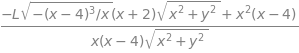

In [4]:
x,y,f,g,L = symbols('x, y, f, g, L')  # use L instead of lambda 
f = sqrt(x**2 + y**2)             # function
g = y - sqrt( (4-x)**3/x )        # constraint
dfdg_dx = diff(f,x) + L*diff(g,x)   # eq 37 diff wrt x
simplify(dfdg_dx) 

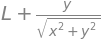

In [5]:
dfdg_dy = diff(f,y) + L*diff(g,y)   # eq 37 , diff wrt y
simplify(dfdg_dy)

hence $\displaystyle \lambda =\frac{y}{\sqrt{x^2+y^2}}$. Next substitute $\lambda $ into the result dfdf_dx and at the same time substitute also for $y=\sqrt{(4-x)^3/x}$ so that an expression in $x$ only  results.

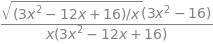

In [6]:
ans = dfdg_dx.subs( L, -y/(sqrt(x**2+y**2)) ).subs( y, sqrt( (4-x)**3/x ) )
simplify(ans)

The equation remaining is 

$$\displaystyle \frac{(3x^2-16)\sqrt{(3x^2-12x+16)/x}}{x(3x^3-12x+16)}=0$$

and as the result equals zero both sides can be multiplied by the denominator to give $(3x^2-16)\sqrt{(3x^2-12x+16)/x}$ so either of these two terms may be zero. The square root has an imaginary solution so the only possible result is that $x=\sqrt{16/3} = 2.309$ and $y = 1.446$ the shortest distance is therefore $7.425$.

Note that the symbolic computer result has a different from to that worked out by hand but produces the same result as it has been factored to a greater extent than that done by hand.


### Q88 answer
Using the Lagrange undetermined multiplier method, eqn (37), the function is $f (a, b) = ab$ and constraint $g(a, b) = a^2 + b^2 - 1$. Differentiating with respect to $a$ then $b$ respectively produces the two equations $b+2a\lambda =0$ and $a+2b\lambda =0$.

From these last two equations, the product $ab = (2abλ)^2$, therefore $ab = 1/4\lambda$. Also, from the two equations, $a^2 + b^2 = 4λ^2(a^2 + b^2)$ and therefore $\lambda = 1/2$. Since $ab = 1/4\lambda$ the answer to the question is $ab = 1/2$.

(b) Graphically $a^2 + b^2 = 1$ is the equation of a unit radius circle centred at the origin on axes $a$ and $b$, and $ab = 1/2$ is the equation of a hyperbola. Plotting them together shows they touch at only one point.

![Drawing](differen-fig62.png)

Figure 62 Plot showing that $ab = 1/2$ is a maximum if constrained by $a^2 +b^2 =1$.
____

### Q89 answer
The  time for a photon to go from A to B is distance/ speed (see fig 32). The speed of light in the medium is $c/n_a$ for the top medium and $c/n_b$ for the other. The distance AO is, by trigonometry, $a/\cos(\theta_a)$ and similarly OB is $b/\cos(\theta_b)$. The total time taken to get from A to B is therefore 

$$\displaystyle  t=\frac{an_a}{c\cos(\theta_a)}+\frac{bn_b}{c\cos(\theta_b)}$$

The constraint is the distance $c + d$ which is $d = a \tan(\theta_a)+ b \tan(\theta_b)$. Using the Lagrange multiplier equation (37) the time taken is the function $f$ and the constraint $g= a \tan(\theta_a)+ b \tan(\theta_b)-d$ and the differentiating variables are the two angles. The derivatives and simultaneous equations are

$$\displaystyle \frac{dt}{d\theta_a}+\lambda\frac{dg}{d\theta_a} = \frac{an_a}{c\cos^2(\theta_a)}\sin(\theta_a)+ \lambda a(1+\tan^2(\theta_a)=0$$

$$\displaystyle \frac{dt}{d\theta_b}+\lambda\frac{dg}{d\theta_b} = \frac{bn_b}{c\cos^2(\theta_b)}\sin(\theta_b)+ \lambda b(1+\tan^2(\theta_b)=0$$

As these two equations are each zero we can easily solve for $\lambda$ by multiplying by $\cos^2()$ and using $\cos^2()+\sin^2()=1$. The result is that

$$\displaystyle  \frac{n_a\sin(\theta_a)}{c}=\frac{n_b\sin(\theta_b)}{c}$$

which proves Snell's Law usually written as $n_a\sin(\theta_a) = n_b\sin(\theta_b)$.

### Q90 answer
When there are $n$ species, the sum of the mole fractions must still make unity making the constraint $\sum_{i=1}^n x_i = 1$ and the function is the entropy 

$$S=-k_B\sum_{i=1}^nx_i\ln(x_i)$$

Using the Lagrange multiplier method for each species $i$ and by differentiating with respect to $x_1$ then $x_2$ etc., a series of $n$ equations is produced. The first two are 

$$-k_B(\ln(x_1)+1)+\lambda=0\quad\text{ and }\quad -k_B  (\ln(x_2)+1)+\lambda = 0$$

As all these equations are equal to one another, i.e. each are zero, it follows that 

$$-k_B (\ln(x_1) + 1) = -k_B(\ln(x_2) + 1) = \cdots$$

and so on for all species. As each $x_i$ is the mole fraction of species $i$, $x_i$ is a real number between 0 and 1 and with some simplifying it follows that $\ln(x_1) = \ln(x_2) = \cdots$ and hence,

$$\displaystyle  x_i=x_2=x_3=\cdots x_n$$

and for this to be true, any particular mole fraction has to satisfy $x_i = 1/n$. Putting this relationship into the equation for the entropy produces the maximum value,

$$\displaystyle S=-k_B\sum_{i=1}^n \frac{1}{n}\ln\left(\frac{1}{n}\right)=-k_B\frac{1}{n}\ln\left(\frac{1}{n}\right)\sum_{i=1}^n 1 = k_B\ln(n)$$

Recall that $\ln(1/n)=-\ln(n)$ and that $\sum_{i=1}^n 1 =n$.

### Q91 answer
The minimisation function is 

$$Q=-\sum_{v=0}^n x_v\ln(x_v)+\lambda\sum_{v=0}^n x_v=-\sum_{v=0}^n (x_v\ln(x_v)-\lambda x_v)$$

with $\lambda$ as the undetermined multiplier, and the derivatives needed are $dQ/dx_v = 0$. Differentiating gives

$$\displaystyle \frac{d}{dx_v}\left( -\sum_{v=0}^n (x_v\ln(x_v)-\lambda x_v) \right)=-\sum_{v=0}^n(\ln(x_v)+1-\lambda=0$$

therefore, 

$$\ln(x_v) + 1 - \lambda = 0$ or $x_v = e^{\lambda-1}$$

Because the total of all the fractional populations $x_v$ is 1 then 

$$\displaystyle \sum_{v=0}^n x_v = \sum_{v=0}^n e^{\lambda-1}= e^{\lambda-1}\sum_{v=0}^n 1=ne^{\lambda-1}=1$$

In the question, this last sum is also $1$, then substituting for the exponential $x_v = e^{\lambda-1}$ gives $x_v = 1/n$ where $n$ is the total number of levels populated. The distribution $x_v = 1/n$ is uniform because each vibrational level has an equal chance of being populated, and we conclude that when the vibrational level populations are distributed for maximum entropy, then this uniform distribution is expected. This is easy to observe experimentally, however, in this particular reaction a non-uniform vibrational distribution was observed because energy can also be placed into rotational levels. The experimental data can be seen in Polanyi & Schreiber (1977).


### Q92 answer
Call the constraints 

$$g(x,y,z)=x+y+z-1=0\quad \text{ and }\quad h(x,y,z)=x^2 +z^2 -1=0$$

The $Q$ function is $Q = f + \lambda g + \mu h$ or explicitly 

$$Q=4x+3y+10z+\lambda(x+y+z-1)+\mu(x^2 +z^2 -1)$$

and their derivatives in $x$, $y$ and $z$ are set to zero.

In [7]:
x, y, z, f, g, h, M, L =symbols('x, y, z, f, g, h, M, L')

f = 4*x + 3*y + 10*z
g = x + y + z - 1
h = x**2 + z**2 - 1
Q = f + L*g + M*h
diff_x = diff(Q,x)
diff_y = diff(Q,y)
diff_z = diff(Q,z)
ans = solve((diff_x,diff_y,diff_z,g,h), (x,y,z,L,M))
ans

The order of the solutions is the same as in the solve command thus $x =\pm \sqrt{2}/10\; y=\pm(1+4\sqrt{2}/5)\; z=\pm 7\sqrt{2}/10\; \lambda = -3, \mu=\pm 5/\sqrt{2}$. The two values give the maximum and minimum values thus $f_{max}=10.07$ and $f_{min}=-4.07$.